subject\
condition: 1 = unbraced (normal walking), 2 = knee brace, 3 = ankle brace\
replication: Each subject repeated each condition approximately ten times\
leg: 1 = Left leg, 2 = Right leg\
joint: 1 = Ankle joint, 2 = Knee joint, 3 = Hip joint\
time: Normalized gait cycle time (in %)\
angle: 0° corresponds to a standing posture. Positive values represent flexion (bending), while negative values represent extension or plantar flexion.

### TASK Description
就比如说有一个男的走进来，测了所有的特征值，模型预测出来condition等于2，那这个现实意义是表明他右膝关节活动模式显示出“受限或僵硬”的特征\
可能的病理原因：受伤、术后僵硬、左腿有问题但为了保持步长协同右腿也减少活动角度

In [2]:
import pandas as pd
df = pd.read_csv("./project_data/gait.csv")
# print(df.head(20))
print(df)
# print(df.columns)
print(df.dtypes)


        subject  condition  replication  leg  joint  time      angle
0             1          1            1    1      1     0   4.682881
1             1          1            1    1      1     1   5.073127
2             1          1            1    1      1     2   5.229774
3             1          1            1    1      1     3   5.083273
4             1          1            1    1      1     4   4.652399
...         ...        ...          ...  ...    ...   ...        ...
181795       10          3           10    2      3    96  29.778412
181796       10          3           10    2      3    97  29.247559
181797       10          3           10    2      3    98  28.796951
181798       10          3           10    2      3    99  28.432936
181799       10          3           10    2      3   100  28.136438

[181800 rows x 7 columns]
subject          int64
condition        int64
replication      int64
leg              int64
joint            int64
time             int64
angle  

Traditional models(Logistic Regression, SVM, Random Forest, KNN, Naive Bayes) can’t handle matrices

I chose to use aggregated features instead of flattened raw matrices, because\
flattening which treats every time point as an independent feature includes everything and increases the risk of overfitting\

### Restructure

1. According to Hadley Wickham’s Tidy Data framework (2014):
Each row represents one observation.
Each column represents one variable.
Each table represents one unit of analysis.
2. Preserves the full experimental hierarchy

In [100]:
df_prep = df.pivot_table(
    index=['subject', 'condition', 'replication', 'time'],
    columns=['leg', 'joint'],                              
    values='angle').reset_index()                                           

df_prep.columns = [
    f'leg{l}_joint{j}_angle' if isinstance(l, (int, float)) else l
    for l, j in df_prep.columns
]
df_prep

,subject,condition,replication,time,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle
0,1,1,1,0,4.682881,3.693683,16.607868,5.015829,2.244425,18.948290
1,1,1,1,1,5.073127,4.258876,16.851029,5.291201,3.381678,19.265300
2,1,1,1,2,5.229774,5.346945,17.170098,5.410528,4.925566,19.600469
3,1,1,1,3,5.083273,6.769831,17.504693,5.270628,6.623978,19.871755
4,1,1,1,4,4.652399,8.351716,17.806602,4.814143,8.268602,20.016564
...,...,...,...,...,...,...,...,...,...,...
30295,10,3,10,96,5.469052,0.964147,25.046914,-4.136161,2.616228,29.778412
30296,10,3,10,97,5.994900,-1.377103,24.753520,-4.050542,0.721412,29.247559
30297,10,3,10,98,6.625519,-2.884798,24.636438,-3.933841,-0.629712,28.796951
30298,10,3,10,99,7.293149,-3.532651,24.695275,-3.837398,-1.438054,28.432936


In [101]:
df_prep = (df_prep.groupby(['subject', 'condition', 'replication'], as_index=False).mean(numeric_only=True))
df_prep = df_prep.drop(columns=['time'])
df_prep

,subject,condition,replication,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle
0,1,1,1,7.850984,21.860145,4.597241,7.061943,22.231482,5.737394
1,1,1,2,7.003371,22.046200,2.934972,7.019926,24.393793,7.028008
2,1,1,3,6.907690,21.322701,4.043684,6.819900,23.229125,5.152094
3,1,1,4,6.380351,21.382904,4.930818,6.854509,23.377511,6.430136
4,1,1,5,6.618724,20.029062,4.116368,6.731278,21.839641,5.738954
...,...,...,...,...,...,...,...,...,...
295,10,3,6,4.898748,16.617524,14.213398,-4.118666,15.443605,12.678103
296,10,3,7,4.279994,17.544801,12.398080,-4.005039,15.673333,12.378648
297,10,3,8,4.972162,16.358994,13.095796,-4.031724,15.479382,11.532245
298,10,3,9,5.038511,18.387504,13.683937,-3.851888,15.695331,11.396588


Although the walking trials were performed continuously, each gait cycle was individually normalized.   So, if I concatenate replication and time, the resulting time axis will no longer be continuous.  I am considering abandoning models that involve time series split and lag.

Compute right–left differences, to explore gait asymmetry

In [102]:
df_prep['ankle_diff'] = df_prep['leg2_joint1_angle'] - df_prep['leg1_joint1_angle']
df_prep['knee_diff']  = df_prep['leg2_joint2_angle'] - df_prep['leg1_joint2_angle']
df_prep['hip_diff']   = df_prep['leg2_joint3_angle'] - df_prep['leg1_joint3_angle']
df_prep

,subject,condition,replication,leg1_joint1_angle,leg1_joint2_angle,leg1_joint3_angle,leg2_joint1_angle,leg2_joint2_angle,leg2_joint3_angle,ankle_diff,knee_diff,hip_diff
0,1,1,1,7.850984,21.860145,4.597241,7.061943,22.231482,5.737394,-0.789041,0.371337,1.140153
1,1,1,2,7.003371,22.046200,2.934972,7.019926,24.393793,7.028008,0.016555,2.347593,4.093037
2,1,1,3,6.907690,21.322701,4.043684,6.819900,23.229125,5.152094,-0.087790,1.906423,1.108410
3,1,1,4,6.380351,21.382904,4.930818,6.854509,23.377511,6.430136,0.474158,1.994607,1.499318
4,1,1,5,6.618724,20.029062,4.116368,6.731278,21.839641,5.738954,0.112555,1.810579,1.622586
...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,3,6,4.898748,16.617524,14.213398,-4.118666,15.443605,12.678103,-9.017414,-1.173919,-1.535295
296,10,3,7,4.279994,17.544801,12.398080,-4.005039,15.673333,12.378648,-8.285033,-1.871468,-0.019432
297,10,3,8,4.972162,16.358994,13.095796,-4.031724,15.479382,11.532245,-9.003886,-0.879612,-1.563550
298,10,3,9,5.038511,18.387504,13.683937,-3.851888,15.695331,11.396588,-8.890399,-2.692173,-2.287350


### EDA

In [103]:
print(df_prep.shape)

(300, 12)


Since the dataset is small and prone to overfitting, I may apply regularization in the following process.

In [104]:
print(df_prep.dtypes)

subject                int64
condition              int64
replication            int64
leg1_joint1_angle    float64
leg1_joint2_angle    float64
leg1_joint3_angle    float64
leg2_joint1_angle    float64
leg2_joint2_angle    float64
leg2_joint3_angle    float64
ankle_diff           float64
knee_diff            float64
hip_diff             float64
dtype: object


In [98]:
print(df_prep[df_prep['subject'] == 1])

    subject  condition  replication  leg1_joint1_angle  leg1_joint2_angle  \
0         1          1            1           7.850984          21.860145   
1         1          1            2           7.003371          22.046200   
2         1          1            3           6.907690          21.322701   
3         1          1            4           6.380351          21.382904   
4         1          1            5           6.618724          20.029062   
5         1          1            6           7.000177          21.232840   
6         1          1            7           7.163482          21.752690   
7         1          1            8           6.987139          21.653898   
8         1          1            9           7.046419          20.893777   
9         1          1           10           6.950427          21.228568   
10        1          2            1           7.674093          20.650967   
11        1          2            2           7.532093          21.946555   

In [91]:
print(df_prep['leg1_joint1_angle'].describe())
# print(df_prep['leg1_joint2_angle'].describe())
# print(df_prep['leg1_joint3_angle'].describe())
# print(df_prep['leg1_joint1_angle'].describe())
# print(df_prep['leg2_joint2_angle'].describe())
# print(df_prep['leg2_joint3_angle'].describe())
print(df_prep['ankle_diff'].describe())
# print(df_prep['knee_diff'].describe())
# print(df_prep['hip_diff'].describe())

## negative angle means hyperextension

count    300.000000
mean       5.161283
std        1.574655
min        0.323233
25%        4.266238
50%        5.258992
75%        6.254865
max        9.648354
Name: leg1_joint1_angle, dtype: float64
count    300.000000
mean      -1.765787
std        4.132999
min      -11.015165
25%       -4.252435
50%       -0.972602
75%        0.493236
max        7.352222
Name: ankle_diff, dtype: float64


All nine features can be reasonably regarded as continuous variables.

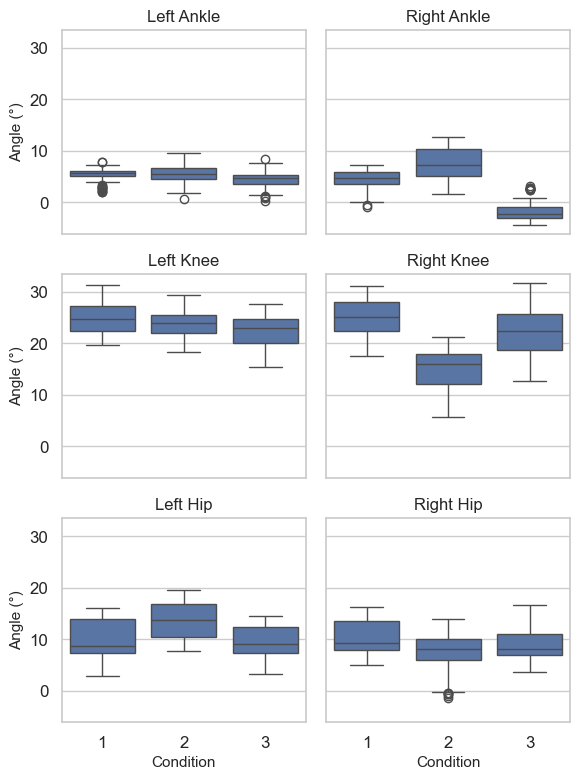

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

leg1_cols = ['leg1_joint1_angle', 'leg1_joint2_angle', 'leg1_joint3_angle']
leg2_cols = ['leg2_joint1_angle', 'leg2_joint2_angle', 'leg2_joint3_angle']
titles = ['Ankle', 'Knee', 'Hip']


fig, axes = plt.subplots(3, 2, figsize=(6,8), sharex=True, sharey=True)

for i in range(3):
    sns.boxplot(x='condition', y=leg1_cols[i], data=df_prep,ax=axes[i, 0])
    axes[i, 0].set_title(f"Left {titles[i]}", fontsize=12)
    axes[i, 0].set_xlabel('') 
    axes[i, 0].set_ylabel('Angle (°)', fontsize=11)

    sns.boxplot(x='condition', y=leg2_cols[i], data=df_prep,ax=axes[i, 1])
    axes[i, 1].set_title(f"Right {titles[i]}", fontsize=12)
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')


for ax in axes[-1, :]:
    ax.set_xlabel('Condition', fontsize=11)

plt.tight_layout()
plt.show()


通过对比左右两列图可以得到，brace会对右侧腿部关节的大致影响，左腿可以视作对照组\
ankle部分，当然受到ankle brace的影响其活动会受限制，但是在with knee brace时，ankle的活动角度普遍升高了\
knee部分，同意会受到对应部分knee brace的影响，而ankle brace 会让他角度活动范围扩大\
hip会受到knee brace的影响，活动角度会缩小


Comparing the left and right columns, the brace mainly affects the right leg; the left leg can be seen as the control group.
For the ankle, movement is restricted under the ankle brace, but appears slightly increased under the knee brace.
For the knee, its movement is restricted under the knee brace, while the ankle brace slightly increases its mobility.
For the hip, the knee brace reduces the range of motion.

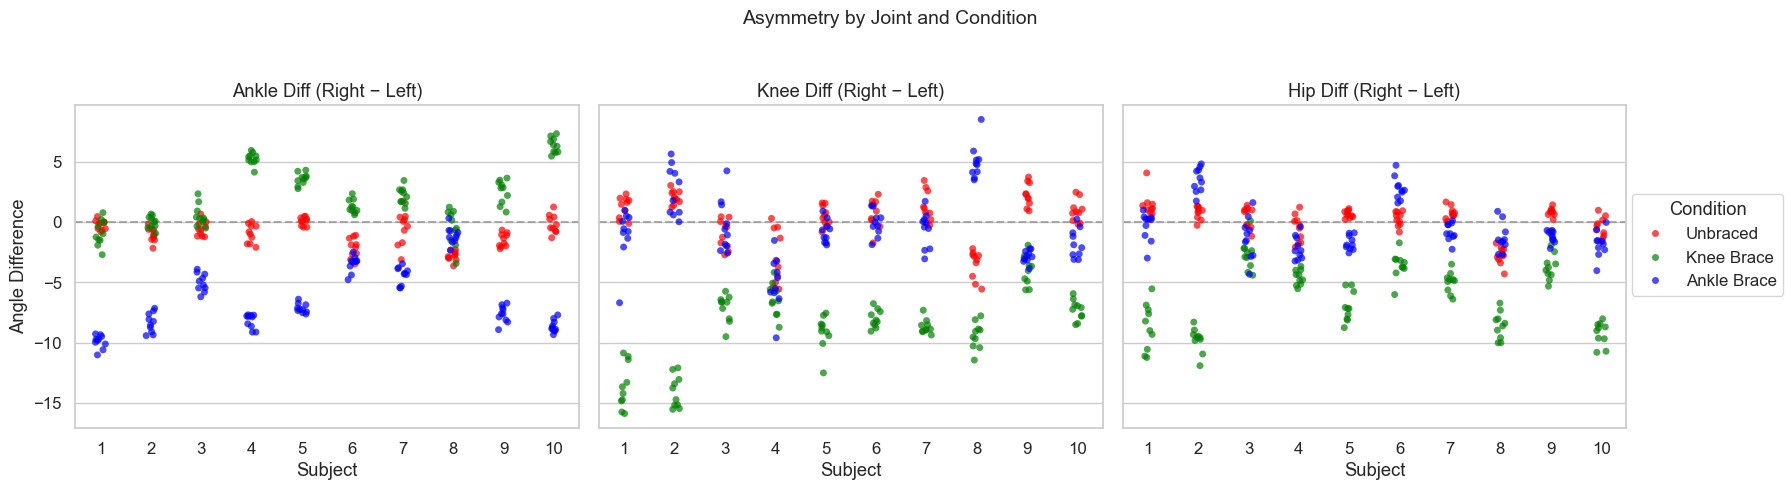

In [93]:
palette = {
    1: 'RED', 
    2: 'GREEN', 
    3: 'BLUE' 
}

diff_vars = ['ankle_diff', 'knee_diff', 'hip_diff']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, var in zip(axes, diff_vars):
    sns.stripplot(
        data=df_prep,
        x='subject',
        y=var,
        hue='condition',
        palette=palette,
        jitter=True,
        alpha=0.7,
        ax=ax
    )
    ax.axhline(0, color='gray', linestyle='--', alpha=0.6)
    ax.set_title(f'{var.replace("_", " ").title()} (Right − Left)')
    ax.set_xlabel('Subject')
    ax.set_ylabel('Angle Difference')
    ax.legend_.remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, ['Unbraced', 'Knee Brace', 'Ankle Brace'], title='Condition', loc='center right')

plt.suptitle('Asymmetry by Joint and Condition', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.show()


ankle difference在ankle braze的作用下不对称性是最显著的，右腿ankle部分活动受到了明显限制，但在with knee brace的时候部分subject右侧ankle的活动大于左边\
knee difference在knee braze的作用下不对称性是最显著的，右腿knee部分活动受到了明显限制，在其余两种情况下并没有很明显的差异，只有轻微的波动\
值得注意的是，hip difference在knee braze的作用下不对称性是最显著的，在其余两种情况下并没有很明显的差异，有理由提出假设knee brace会限制hip的活动，或者说在实际中就是患者的knee部分的僵化和受伤在一定程度上也会影响hip

The ankle shows the strongest asymmetry under the ankle brace; right ankle motion is clearly restricted, but under the knee brace some subjects show greater right-ankle motion.
The knee shows the strongest asymmetry under the knee brace; right knee motion is clearly limited, while the other two conditions show only small variations.
Interestingly, the hip shows the greatest asymmetry under the knee brace; this suggests that the knee brace may also restrict hip motion, or that knee stiffness/injury can indirectly affect hip movement.

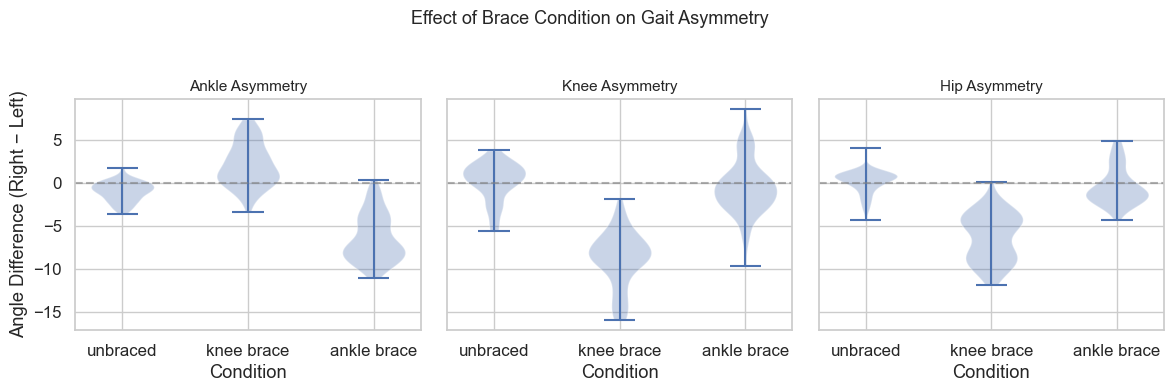

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

joints = ['ankle_diff', 'knee_diff', 'hip_diff']
titles = ['Ankle Asymmetry', 'Knee Asymmetry', 'Hip Asymmetry']

for ax, joint, title in zip(axes, joints, titles):
    dataset = [
        df_prep[df_prep['condition'] == 1][joint].values,
        df_prep[df_prep['condition'] == 2][joint].values,
        df_prep[df_prep['condition'] == 3][joint].values
    ]

    ax.violinplot(dataset=dataset)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['unbraced', 'knee brace', 'ankle brace'])
    ax.set_title(title, fontsize=11)
    ax.axhline(0, color='gray', linestyle='--', alpha=0.6)
    ax.set_xlabel('Condition')
    if joint == 'ankle_diff':
        ax.set_ylabel('Angle Difference (Right − Left)')

plt.suptitle('Effect of Brace Condition on Gait Asymmetry', fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


可以看到三个关节的asymmetry在加上brace之后极差都显著增大了，可以提出猜想：
ankle和knee的brace都同时会对ankle和knee阐述影响，而knee brace会对hip产生影响，ankle brace的影响不显著

After applying the brace, the range (spread) of asymmetry increases significantly for all three joints, suggesting that
Both the ankle brace and the knee brace affect both the ankle and knee joints, while the knee brace also influences the hip joint, whereas the effect of the ankle brace on the hip is not significant.

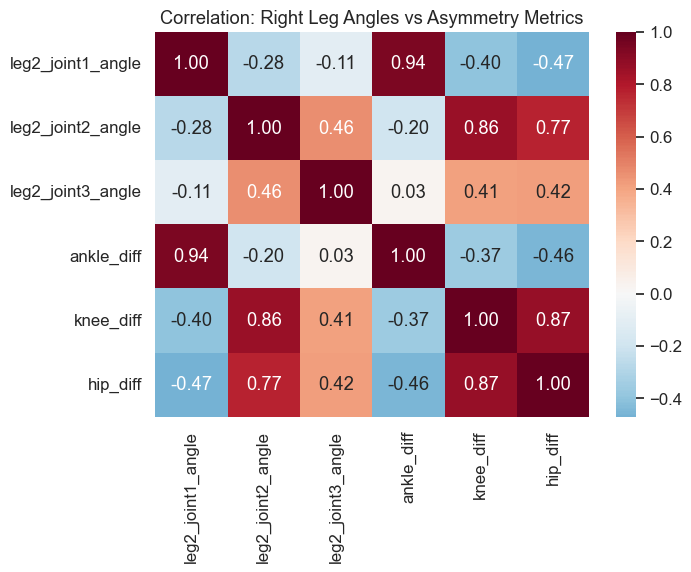

In [47]:
cols = ['leg2_joint1_angle', 'leg2_joint2_angle', 'leg2_joint3_angle', 'ankle_diff', 'knee_diff', 'hip_diff']
corr = df_prep[cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(
    corr,
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt='.2f'
)
plt.title('Correlation: Right Leg Angles vs Asymmetry Metrics')
plt.show()


可以看到，右脚ankle角度越大，ankle不对称性越强，说明 ankle_diff 很大程度上受右踝运动驱动。右膝角度变化直接导致膝关节不对称性变化，说明knee brace 改变右膝活动幅度导致不对称性上升。
右膝角度变化几乎总是伴随着髋部角度的变化，说明膝关节的受限运动会直接传导影响到髋关节的活动模式。

It can be seen that a larger right-ankle angle corresponds to greater ankle asymmetry, indicating that ankle_diff is largely driven by right-ankle motion.
Changes in the right-knee angle directly lead to variations in knee asymmetry, suggesting that the knee brace increases asymmetry by altering the range of motion of the right knee.
Moreover, changes in the right-knee angle are almost always accompanied by changes in the hip angle, implying that restricted knee motion directly influences the movement pattern of the hip joint.

According to the EDA, I could clearly see that the brace conditions change the overall movement range of each joint through all the 10 replications. Some joints show reduced range of motion under the brace.

Since the original aggregation removed the time dimension and summarized each replication into a single row, I wanted to make sure that these brace-induced changes in movement range are still captured in the aggregated features. So instead of only taking the mean, I compute mean, standard deviation, minimum, maximum, and range for every joint on every leg in every replication.

This way, each gait cycle still reflects how much that joint is moving and how the brace affects its overall variability and range of motion.


### Restructure 2.0

In [50]:
import pandas as pd
df = pd.read_csv("./project_data/gait.csv")

# agg_df = df.groupby(["subject", "condition", "replication", "leg", "joint"])["angle"].agg(
#     mean_angle="mean",
#     std_angle="std"
# ).reset_index()

agg_df = df.groupby(["subject", "condition", "replication", "leg", "joint"])["angle"].agg(
    mean_angle="mean",
    std_angle="std",
    min_angle="min",
    max_angle="max"
).reset_index()
agg_df["range_angle"] = agg_df["max_angle"] - agg_df["min_angle"]
# print(agg_df)

# df_prep = agg_df.pivot_table(
#     index=["subject", "condition", "replication"],
#     columns=["leg", "joint"],
#     values=["mean_angle", "std_angle"]
# )

df_prep = agg_df.pivot_table(
    index=["subject", "condition", "replication"],
    columns=["leg", "joint"],
    values=["mean_angle", "std_angle", "min_angle", "max_angle", "range_angle"]
)

# print(df_prep)

df_prep.columns = [
    f"leg{leg}_joint{joint}_{stat}"
    for stat, leg, joint in df_prep.columns
]
# print(df_prep.columns)

df_prep = df_prep.reset_index()

df_prep["ankle_diff"] = df_prep["leg1_joint1_mean_angle"] - df_prep["leg2_joint1_mean_angle"]
df_prep["knee_diff"]  = df_prep["leg1_joint2_mean_angle"] - df_prep["leg2_joint2_mean_angle"]
df_prep["hip_diff"]   = df_prep["leg1_joint3_mean_angle"] - df_prep["leg2_joint3_mean_angle"]

# print(df_prep.columns)
print(df_prep.head())


   subject  condition  replication  leg1_joint1_max_angle  \
0        1          1            1              13.369976   
1        1          1            2              13.221472   
2        1          1            3              12.662596   
3        1          1            4              11.780479   
4        1          1            5              13.014492   

   leg1_joint2_max_angle  leg1_joint3_max_angle  leg2_joint1_max_angle  \
0              62.239251              21.401424              13.584862   
1              64.317481              20.484142              11.865704   
2              62.805217              21.261535              13.877307   
3              65.160693              22.073713              13.019480   
4              62.903760              20.981106              12.816035   

   leg2_joint2_max_angle  leg2_joint3_max_angle  leg1_joint1_mean_angle  ...  \
0              62.445295              22.082553                7.850984  ...   
1              66.191037    

In [112]:
df_prep

,subject,condition,replication,leg1_joint1_max_angle,leg1_joint2_max_angle,leg1_joint3_max_angle,leg2_joint1_max_angle,leg2_joint2_max_angle,leg2_joint3_max_angle,leg1_joint1_mean_angle,...,leg2_joint3_range_angle,leg1_joint1_std_angle,leg1_joint2_std_angle,leg1_joint3_std_angle,leg2_joint1_std_angle,leg2_joint2_std_angle,leg2_joint3_std_angle,ankle_diff,knee_diff,hip_diff
0,1,1,1,13.369976,62.239251,21.401424,13.584862,62.445295,22.082553,7.850984,...,35.621442,5.137240,18.214232,12.563371,4.313286,18.466275,12.731324,0.789041,-0.371337,-1.140153
1,1,1,2,13.221472,64.317481,20.484142,11.865704,66.191037,24.109056,7.003371,...,37.310610,5.667427,19.048641,12.990357,4.114043,19.666292,12.736948,-0.016555,-2.347593,-4.093037
2,1,1,3,12.662596,62.805217,21.261535,13.877307,65.300057,23.434250,6.907690,...,39.638053,5.103548,18.669649,12.743381,4.944802,18.874316,13.457144,0.087790,-1.906423,-1.108410
3,1,1,4,11.780479,65.160693,22.073713,13.019480,65.802016,24.997317,6.380351,...,39.586723,4.719326,19.686662,12.886681,4.717388,18.796025,13.252426,-0.474158,-1.994607,-1.499318
4,1,1,5,13.014492,62.903760,20.981106,12.816035,64.093660,22.574356,6.618724,...,37.978543,4.705380,19.358362,12.718005,4.536131,18.954727,12.965368,-0.112555,-1.810579,-1.622586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10,3,6,13.017609,56.064845,30.151928,-1.094239,48.463338,30.487791,4.898748,...,42.540530,6.298306,18.545381,13.307980,1.553449,17.007664,14.396895,9.017414,1.173919,1.535295
296,10,3,7,11.694914,57.292146,29.139327,-1.286535,50.472537,30.956483,4.279994,...,43.708806,6.301778,19.202184,13.355621,1.427259,17.443724,14.927578,8.285033,1.871468,0.019432
297,10,3,8,13.694759,56.875396,27.898749,-0.785391,53.759707,32.190169,4.972162,...,45.579047,5.963640,19.295089,13.148104,2.237173,18.482571,15.458380,9.003886,0.879612,1.563550
298,10,3,9,12.680619,54.774227,28.833213,-0.964694,51.452044,30.351050,5.038511,...,42.756970,6.015162,18.102857,12.736032,1.856883,17.644235,14.903997,8.890399,2.692173,2.287350


#### split: train_val + test

In [51]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold

# X = df_prep[['leg1_joint1_mean_angle',
#        'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
#        'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
#        'leg2_joint3_mean_angle',
#        'ankle_diff','knee_diff','hip_diff']]

X = df_prep[[
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
       # 'leg2_joint1_max_angle', 'leg2_joint2_max_angle',
       # 'leg2_joint3_max_angle', 
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
       # 'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
       # 'leg2_joint3_mean_angle', 
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
       # 'leg2_joint1_min_angle', 'leg2_joint2_min_angle',
       # 'leg2_joint3_min_angle', 
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
       # 'leg2_joint1_range_angle', 'leg2_joint2_range_angle',
       # 'leg2_joint3_range_angle', 
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle',
       # 'leg2_joint1_std_angle', 'leg2_joint2_std_angle',
       # 'leg2_joint3_std_angle',
       'ankle_diff','knee_diff','hip_diff'
             ]]

y = df_prep['condition']
y = df_prep["condition"] - 1
groups = df_prep['subject']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train_val = X.iloc[train_val_idx]
y_train_val = y.iloc[train_val_idx]
groups_train_val = groups.iloc[train_val_idx]

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

print("Train+Val size:", X_train_val.shape)
print("Test size:", X_test.shape)


Train+Val size: (240, 18)
Test size: (60, 18)


baseline: balanced --> proportion of the majority_class\
SVC usually on large dataset?

#### all left legs data + 3 differences 

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# baseline
majority_class = y_train_val.value_counts().idxmax()
baseline_acc = (y_train_val == majority_class).mean()
print(f"Baseline Accuracy: {baseline_acc:.4f}")


models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, n_jobs=1),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression()
}

continuous = [
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
       # 'leg2_joint1_max_angle', 'leg2_joint2_max_angle',
       # 'leg2_joint3_max_angle', 
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
       # 'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
       # 'leg2_joint3_mean_angle', 
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
       # 'leg2_joint1_min_angle', 'leg2_joint2_min_angle',
       # 'leg2_joint3_min_angle', 
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
       # 'leg2_joint1_range_angle', 'leg2_joint2_range_angle',
       # 'leg2_joint3_range_angle', 
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle',
       # 'leg2_joint1_std_angle', 'leg2_joint2_std_angle',
       # 'leg2_joint3_std_angle',
       'ankle_diff','knee_diff','hip_diff'
             ]

param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 7, 10],
        "min_samples_split": [2, 5, 10]
    },

    "Random Forest": {
        "n_estimators": [200, 500, 1000],
        "max_depth": [3, 5, 10],
        "max_features": ["sqrt", "log2"],
    },

    "XGBoost": {
        "n_estimators": [300, 500, 800],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.6, 0.8, 0.9],
        "colsample_bytree": [0.7, 1.0]
    },

    "SVC": {
        "C": np.logspace(-3,3,7),
        "gamma": np.logspace(-3, 3, 7)
    },

    "Logistic Regression": {
        "C": np.logspace(-3,3,7),
        "max_iter": [5000]
    }
}


Baseline Accuracy: 0.3333


Model: Decision Tree
Best params: {'max_depth': 5, 'min_samples_split': 5}
Best validation accuracy: 0.7933333333333332


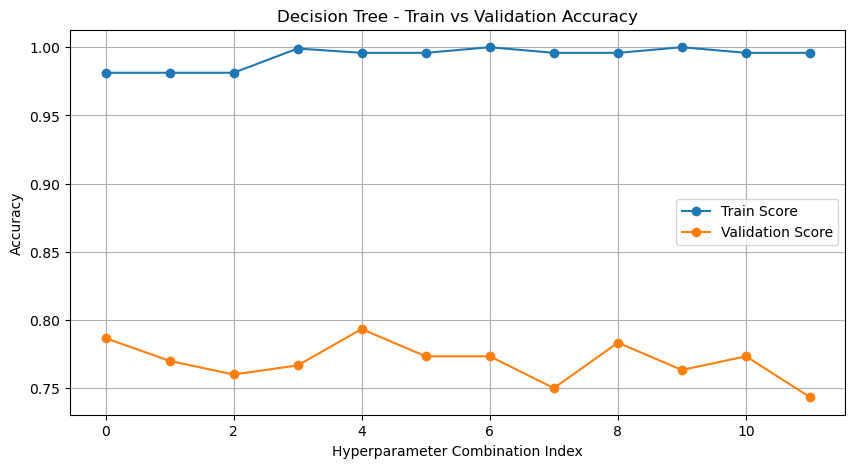

Test accuracy: 0.8666666666666667
Model: Random Forest
Best params: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}
Best validation accuracy: 0.9


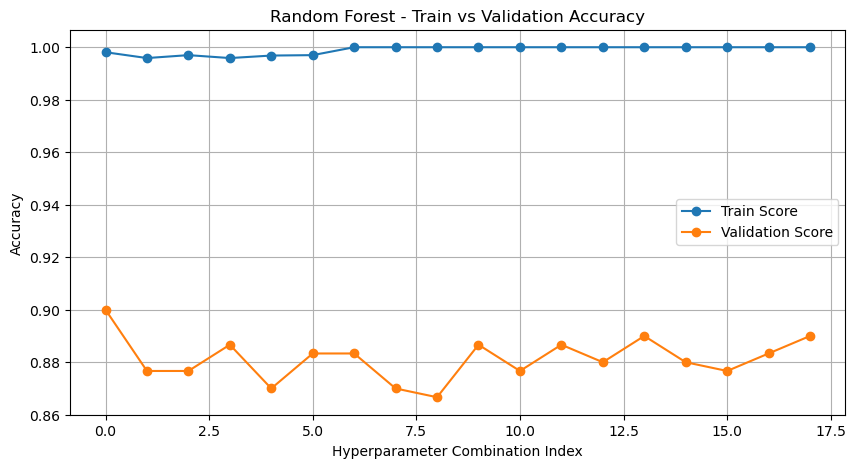

Test accuracy: 0.9333333333333333
Model: XGBoost
Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Best validation accuracy: 0.8699999999999999


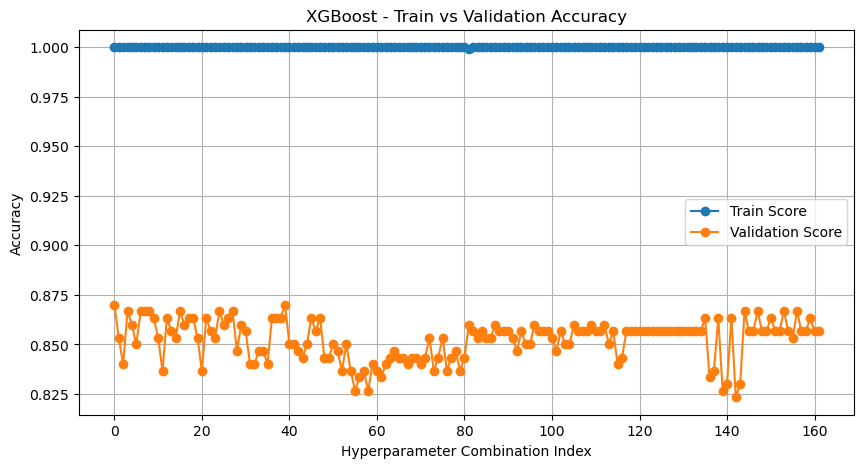

Test accuracy: 0.9333333333333333
Model: SVC
Best params: {'C': np.float64(100.0), 'gamma': np.float64(0.001)}
Best validation accuracy: 0.8633333333333333


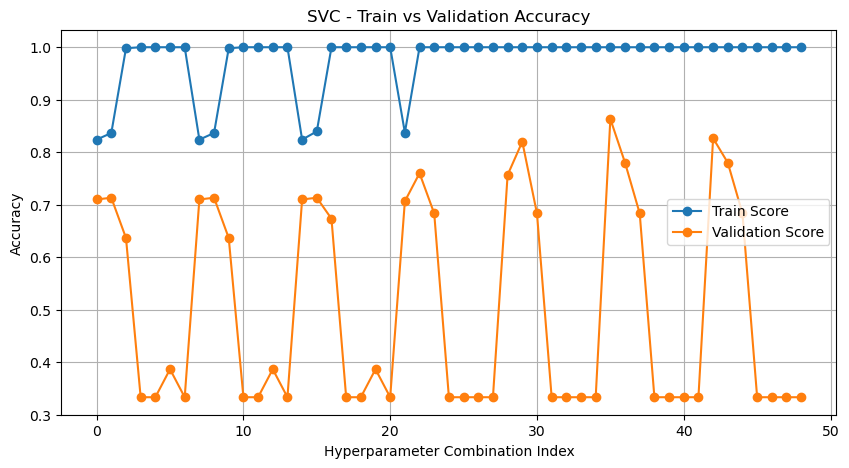

Test accuracy: 1.0
Model: Logistic Regression
Best params: {'C': np.float64(10.0), 'max_iter': 5000}
Best validation accuracy: 0.7733333333333332


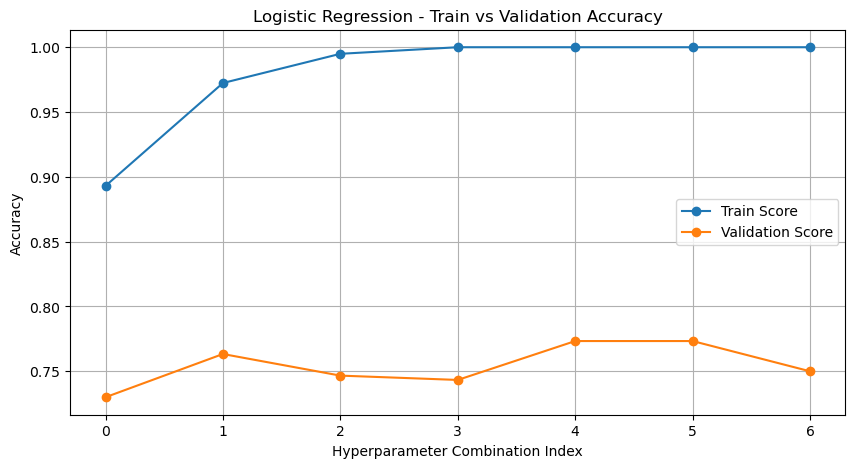

Test accuracy: 0.9666666666666667

FINAL SUMMARY

Model: Decision Tree
Best params: [{'max_depth': 5, 'min_samples_split': 5}]
Mean Test Accuracy: 0.8666666666666667
Test Accuracies: [0.8666666666666667]


Model: Random Forest
Best params: [{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}]
Mean Test Accuracy: 0.9333333333333333
Test Accuracies: [0.9333333333333333]


Model: XGBoost
Best params: [{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}]
Mean Test Accuracy: 0.9333333333333333
Test Accuracies: [0.9333333333333333]


Model: SVC
Best params: [{'C': np.float64(100.0), 'gamma': np.float64(0.001)}]
Mean Test Accuracy: 1.0
Test Accuracies: [1.0]


Model: Logistic Regression
Best params: [{'C': np.float64(10.0), 'max_iter': 5000}]
Mean Test Accuracy: 0.9666666666666667
Test Accuracies: [0.9666666666666667]




In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid, GroupKFold
from sklearn.metrics import accuracy_score

kfold = GroupKFold(n_splits=5)

test_scores = {name: [] for name in models.keys()}
best_params_all = {name: [] for name in models.keys()}

for name, base_model in models.items():
    print(f"Model: {name}")

    grid = list(ParameterGrid(param_grids[name]))
    val_scores_all_params = []
    train_scores_all_params = []

    # For each hyperparameter combination
    for params in grid:
        fold_val_scores = []
        fold_train_scores = []

        # 5-fold GroupKFold
        for train_idx, val_idx in kfold.split(X_train_val, y_train_val, groups_train_val):

            X_train = X_train_val.iloc[train_idx]
            X_val   = X_train_val.iloc[val_idx]

            y_train = y_train_val.iloc[train_idx]
            y_val   = y_train_val.iloc[val_idx]

            # Build pipeline
            pipe = Pipeline([
                ("scaler", StandardScaler()),
                ("clf", base_model.__class__(**params))
            ])

            pipe.fit(X_train, y_train)

            # train score
            train_pred = pipe.predict(X_train)
            fold_train_scores.append(accuracy_score(y_train, train_pred))

            # validation score
            val_pred = pipe.predict(X_val)
            fold_val_scores.append(accuracy_score(y_val, val_pred))

        # average train/val score for this hyperparameter combination
        avg_train = np.mean(fold_train_scores)
        avg_val = np.mean(fold_val_scores)

        train_scores_all_params.append(avg_train)
        val_scores_all_params.append(avg_val)

    # choose best params
    best_idx = np.argmax(val_scores_all_params)
    best_params = grid[best_idx]
    best_params_all[name].append(best_params)

    print("Best params:", best_params)
    print("Best validation accuracy:", val_scores_all_params[best_idx])

    plt.figure(figsize=(10,5))
    plt.plot(train_scores_all_params, label="Train Score", marker='o')
    plt.plot(val_scores_all_params, label="Validation Score", marker='o')
    plt.title(f"{name} - Train vs Validation Accuracy")
    plt.xlabel("Hyperparameter Combination Index")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    best_model = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", base_model.__class__(**best_params))
    ])

    best_model.fit(X_train_val, y_train_val)
    y_test_pred = best_model.predict(X_test)

    test_acc = accuracy_score(y_test, y_test_pred)
    test_scores[name].append(test_acc)

    print("Test accuracy:", test_acc)


print("\nFINAL SUMMARY\n")
for name in models.keys():
    print(f"Model: {name}")
    print("Best params:", best_params_all[name])
    print("Mean Test Accuracy:", np.mean(test_scores[name]))
    print("Test Accuracies:", test_scores[name])
    print("\n")

#### all the data:left legs + right legs

Train+Val size: (240, 33)
Test size: (60, 33)
Baseline Accuracy: 0.3333
Model: Decision Tree
Best params: {'max_depth': 3, 'min_samples_split': 2}
Best validation accuracy: 1.0


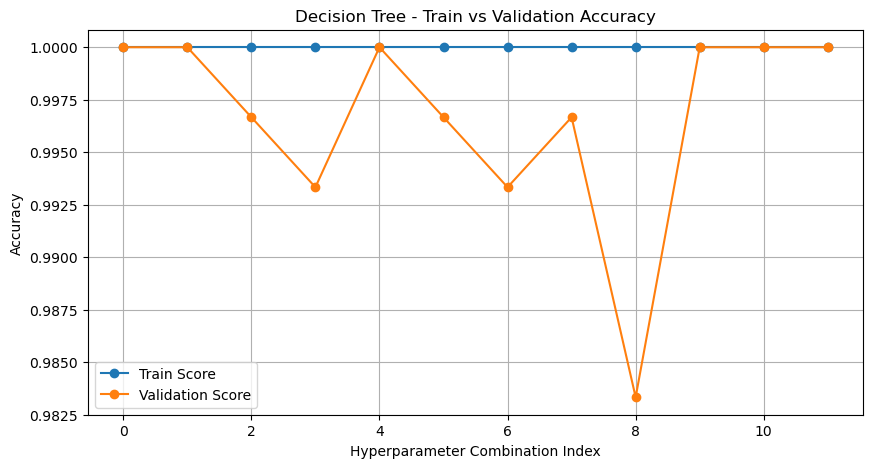

Test accuracy: 1.0
Model: Random Forest
Best params: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}
Best validation accuracy: 1.0


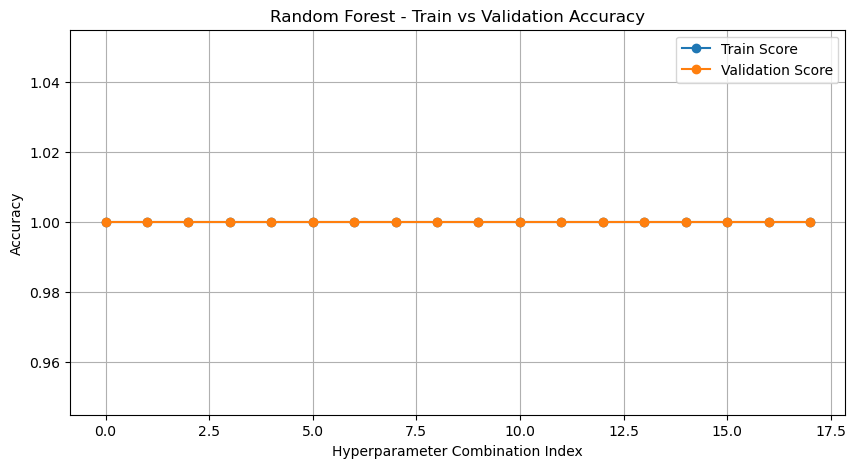

Test accuracy: 1.0
Model: XGBoost
Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best validation accuracy: 1.0


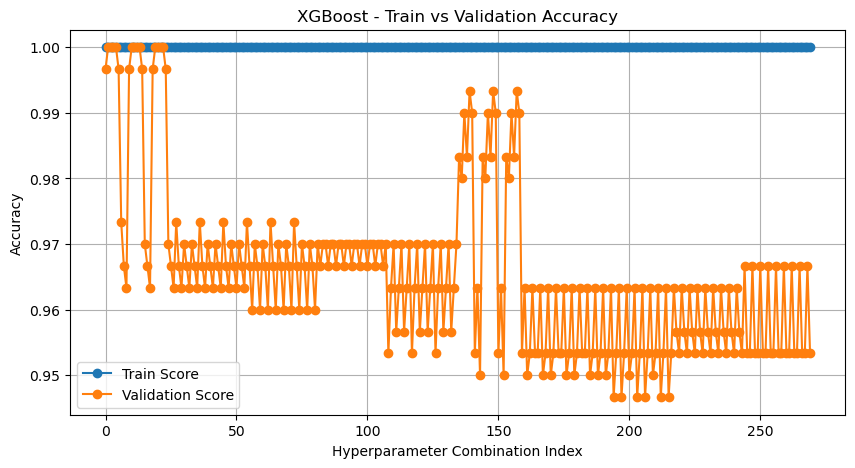

Test accuracy: 1.0
Model: SVC
Best params: {'C': np.float64(1.0), 'gamma': np.float64(0.01)}
Best validation accuracy: 0.9833333333333332


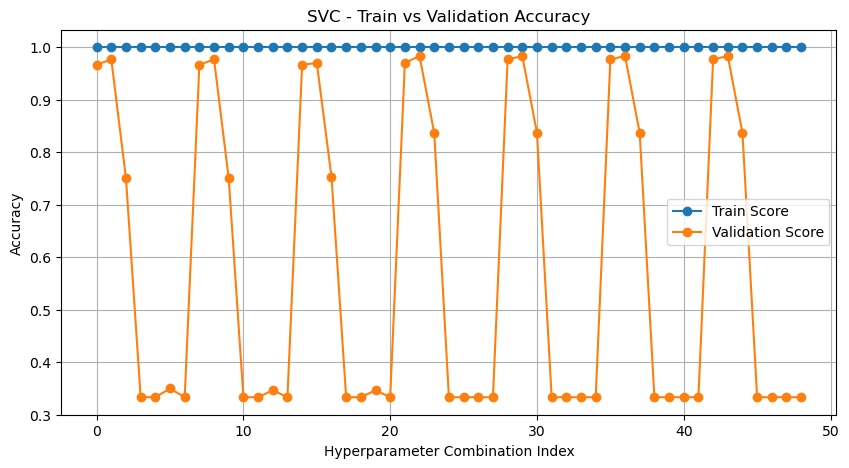

Test accuracy: 1.0
Model: Logistic Regression
Best params: {'C': np.float64(0.001), 'max_iter': 5000}
Best validation accuracy: 0.9666666666666668


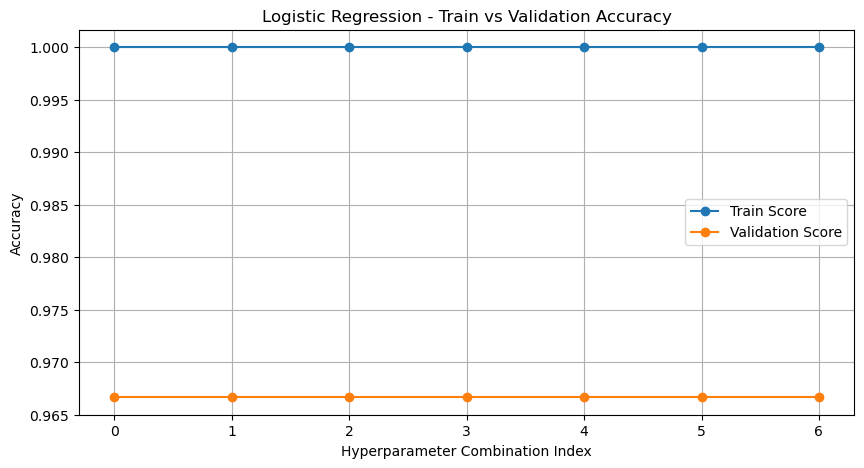

Test accuracy: 1.0

FINAL SUMMARY

Model: Decision Tree
Best params: [{'max_depth': 3, 'min_samples_split': 2}]
Mean Test Accuracy: 1.0
Test Accuracies: [1.0]


Model: Random Forest
Best params: [{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}]
Mean Test Accuracy: 1.0
Test Accuracies: [1.0]


Model: XGBoost
Best params: [{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}]
Mean Test Accuracy: 1.0
Test Accuracies: [1.0]


Model: SVC
Best params: [{'C': np.float64(1.0), 'gamma': np.float64(0.01)}]
Mean Test Accuracy: 1.0
Test Accuracies: [1.0]


Model: Logistic Regression
Best params: [{'C': np.float64(0.001), 'max_iter': 5000}]
Mean Test Accuracy: 1.0
Test Accuracies: [1.0]




In [68]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold

# X = df_prep[['leg1_joint1_mean_angle',
#        'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
#        'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
#        'leg2_joint3_mean_angle',
#        'ankle_diff','knee_diff','hip_diff']]

X = df_prep[[
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
       'leg2_joint1_max_angle', 'leg2_joint2_max_angle',
       'leg2_joint3_max_angle', 
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
       'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
       'leg2_joint3_mean_angle', 
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
       'leg2_joint1_min_angle', 'leg2_joint2_min_angle',
       'leg2_joint3_min_angle', 
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
       'leg2_joint1_range_angle', 'leg2_joint2_range_angle',
       'leg2_joint3_range_angle', 
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle',
       'leg2_joint1_std_angle', 'leg2_joint2_std_angle',
       'leg2_joint3_std_angle',
       'ankle_diff','knee_diff','hip_diff'
             ]]

y = df_prep['condition']
y = df_prep["condition"] - 1
groups = df_prep['subject']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train_val = X.iloc[train_val_idx]
y_train_val = y.iloc[train_val_idx]
groups_train_val = groups.iloc[train_val_idx]

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

print("Train+Val size:", X_train_val.shape)
print("Test size:", X_test.shape)




# baseline
majority_class = y_train_val.value_counts().idxmax()
baseline_acc = (y_train_val == majority_class).mean()
print(f"Baseline Accuracy: {baseline_acc:.4f}")


models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression()
}

continuous = [
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
       'leg2_joint1_max_angle', 'leg2_joint2_max_angle',
       'leg2_joint3_max_angle', 
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
       'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
       'leg2_joint3_mean_angle', 
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
       'leg2_joint1_min_angle', 'leg2_joint2_min_angle',
       'leg2_joint3_min_angle', 
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
       'leg2_joint1_range_angle', 'leg2_joint2_range_angle',
       'leg2_joint3_range_angle', 
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle',
       'leg2_joint1_std_angle', 'leg2_joint2_std_angle',
       'leg2_joint3_std_angle',
       'ankle_diff','knee_diff','hip_diff'
             ]

param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 7, 10],
        "min_samples_split": [2, 5, 10]
    },

    "Random Forest": {
        "n_estimators": [200, 500, 1000],
        "max_depth": [3, 5, 10],
        "max_features": ["sqrt", "log2"],
    },

    "XGBoost": {
        "n_estimators": [300, 500, 800],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01,0.025,0.05,0.1,0.25],
        "subsample": [0.6, 0.8, 0.9],
        "colsample_bytree": [0.7, 1.0]
    },

    "SVC": {
        "C": np.logspace(-3,3,7),
        "gamma": np.logspace(-3, 3, 7)
    },

    "Logistic Regression": {
        "C": np.logspace(-3,3,7),
        "max_iter": [5000]
    }
}

kfold = GroupKFold(n_splits=5)

test_scores = {name: [] for name in models.keys()}
best_params_all = {name: [] for name in models.keys()}
final_models = {}

for name, base_model in models.items():
    print(f"Model: {name}")

    grid = list(ParameterGrid(param_grids[name]))
    val_scores_all_params = []
    train_scores_all_params = []

    # For each hyperparameter combination
    for params in grid:
        fold_val_scores = []
        fold_train_scores = []

        # 5-fold GroupKFold
        for train_idx, val_idx in kfold.split(X_train_val, y_train_val, groups_train_val):

            X_train = X_train_val.iloc[train_idx]
            X_val   = X_train_val.iloc[val_idx]

            y_train = y_train_val.iloc[train_idx]
            y_val   = y_train_val.iloc[val_idx]

            # Build pipeline
            pipe = Pipeline([
                ("scaler", StandardScaler()),
                ("clf", base_model.__class__(**params))
            ])

            pipe.fit(X_train, y_train)

            # train score
            train_pred = pipe.predict(X_train)
            fold_train_scores.append(accuracy_score(y_train, train_pred))

            # validation score
            val_pred = pipe.predict(X_val)
            fold_val_scores.append(accuracy_score(y_val, val_pred))

        # average train/val score for this hyperparameter combination
        avg_train = np.mean(fold_train_scores)
        avg_val = np.mean(fold_val_scores)

        train_scores_all_params.append(avg_train)
        val_scores_all_params.append(avg_val)

    # choose best params
    best_idx = np.argmax(val_scores_all_params)
    best_params = grid[best_idx]
    best_params_all[name].append(best_params)

    print("Best params:", best_params)
    print("Best validation accuracy:", val_scores_all_params[best_idx])

    plt.figure(figsize=(10,5))
    plt.plot(train_scores_all_params, label="Train Score", marker='o')
    plt.plot(val_scores_all_params, label="Validation Score", marker='o')
    plt.title(f"{name} - Train vs Validation Accuracy")
    plt.xlabel("Hyperparameter Combination Index")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", base_model.__class__(**best_params))
    ])

    best_model.fit(X_train_val, y_train_val)

    final_models[name] = best_model
    
    # test accuracy
    y_test_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_scores[name].append(test_acc)

    print("Test accuracy:", test_acc)


print("\nFINAL SUMMARY\n")
for name in models.keys():
    print(f"Model: {name}")
    print("Best params:", best_params_all[name])
    print("Mean Test Accuracy:", np.mean(test_scores[name]))
    print("Test Accuracies:", test_scores[name])
    print("\n")



In [76]:
# best_model = final_models["Logistic Regression"]
best_model = final_models["XGBoost"]
feature_names = X_test.columns.tolist()
nr_runs = 10
perm_results = pd.DataFrame(index=feature_names, columns=["baseline_acc", "shuffled_mean", "shuffled_std"])

baseline_acc = best_model.score(X_test, y_test)
print("Baseline accuracy:", baseline_acc)

for f in feature_names:
    print(f"\nShuffling feature: {f}")
    
    accs = []
    for r in range(nr_runs):
        X_shuffled = X_test.copy()
        X_shuffled[f] = np.random.permutation(X_shuffled[f].values)
        accs.append(best_model.score(X_shuffled, y_test))
    
    perm_results.loc[f, "baseline_acc"]   = baseline_acc
    perm_results.loc[f, "shuffled_mean"]  = np.mean(accs)
    perm_results.loc[f, "shuffled_std"]   = np.std(accs)

    print(" → Shuffled accuracy:", np.mean(accs), " ± ", np.std(accs))


Baseline accuracy: 1.0

Shuffling feature: leg1_joint1_max_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint2_max_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint3_max_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg2_joint1_max_angle
 → Shuffled accuracy: 0.7766666666666666  ±  0.03887301263230201

Shuffling feature: leg2_joint2_max_angle
 → Shuffled accuracy: 0.7333333333333333  ±  0.04472135954999579

Shuffling feature: leg2_joint3_max_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint1_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint2_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg1_joint3_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg2_joint1_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg2_joint2_mean_angle
 → Shuffled accuracy: 1.0  ±  0.0

Shuffling feature: leg2_joint3_mean_angle
 → Shuffled accuracy: 1.0  ±  0

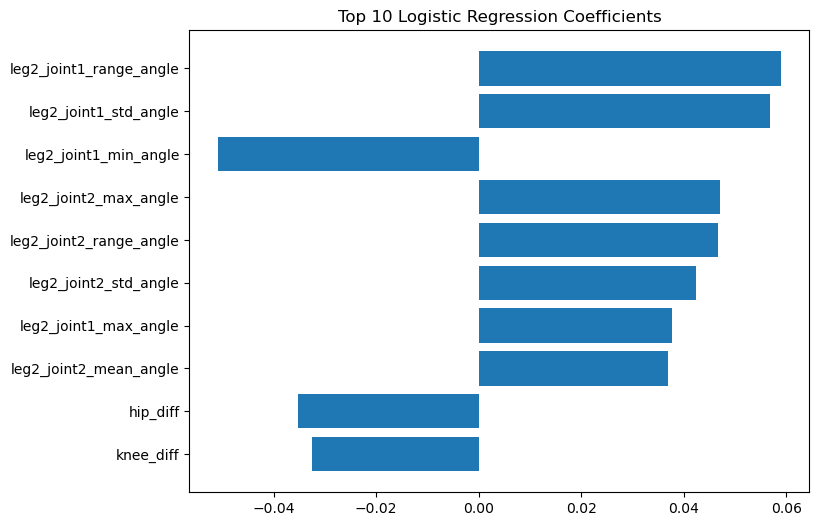

In [74]:
logreg = final_models["Logistic Regression"]
coef = logreg.named_steps["clf"].coef_[0]

features = X.columns

idx = np.argsort(np.abs(coef))

plt.figure(figsize=(8,6))
plt.barh(features[idx][-10:], coef[idx][-10:])
plt.title("Top 10 Logistic Regression Coefficients")
plt.show()

In [98]:
print(shap_vals[0])
        # X_test.iloc[idx],

[-4.9881788e-04  0.0000000e+00 -7.1261398e-05  2.8876669e-04
 -1.1938831e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -2.1231300e-04  2.6165514e-04  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -2.4374417e-04
 -8.1554073e-04  9.7296601e-05 -2.9364115e-01  1.6775588e-04
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -9.5939934e-02  1.4692050e-04  0.0000000e+00 -2.9569520e-02
 -1.0969076e-02]


In [97]:
import shap

best_model = final_models["XGBoost"]
xgb_clf = best_model.named_steps["clf"]
X_test_scaled = best_model.named_steps["scaler"].transform(X_test)

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer(X_test_scaled)

target_class = 1 #knee
# target_class = 2 #ankle

# 取对应 class 的 shap value
base_value = explainer.expected_value[target_class]
shap_vals = shap_values.values[:, :, target_class]

shap.initjs()

# indices = [0, 5, 10]
indices = [10, 20, 50]

for idx in indices:
    print(f"\nindex {idx}:")
    
    display(
        shap.force_plot(
            base_value,
            shap_vals[idx],
            X_test.iloc[idx],
            feature_names=X.columns,
        )
    )


index 10:



index 20:



index 50:


#### only left legs

In [63]:
print("y_train_val distribution:\n", y_train_val.value_counts())
print("y_test distribution:\n", y_test.value_counts())

y_train_val distribution:
 condition
0    80
1    80
2    80
Name: count, dtype: int64
y_test distribution:
 condition
0    20
1    20
2    20
Name: count, dtype: int64


In [64]:
print(df_prep["condition"].value_counts())
print((df_prep["condition"]-1).value_counts())

condition
1    100
2    100
3    100
Name: count, dtype: int64
condition
0    100
1    100
2    100
Name: count, dtype: int64


Train+Val size: (240, 15)
Test size: (60, 15)
Baseline Accuracy: 0.3333
Model: Decision Tree
Best params: {'max_depth': 5, 'min_samples_split': 2}
Best validation accuracy: 0.5533333333333333


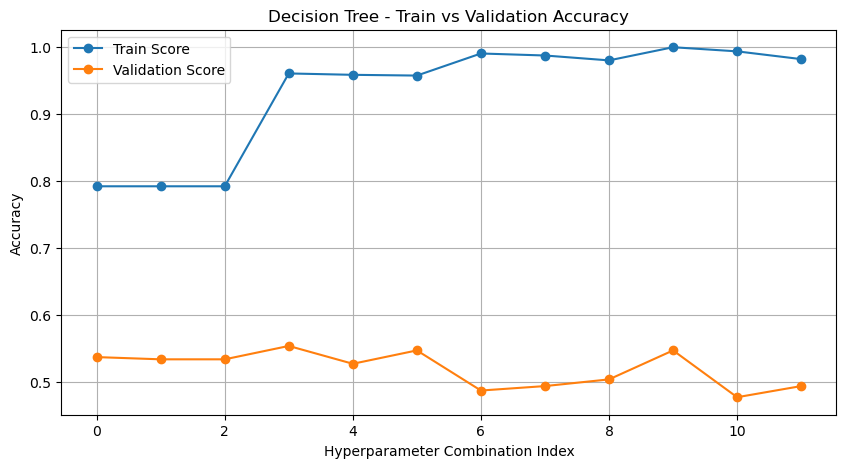

Test accuracy: 0.2833333333333333
Model: Random Forest
Best params: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Best validation accuracy: 0.54


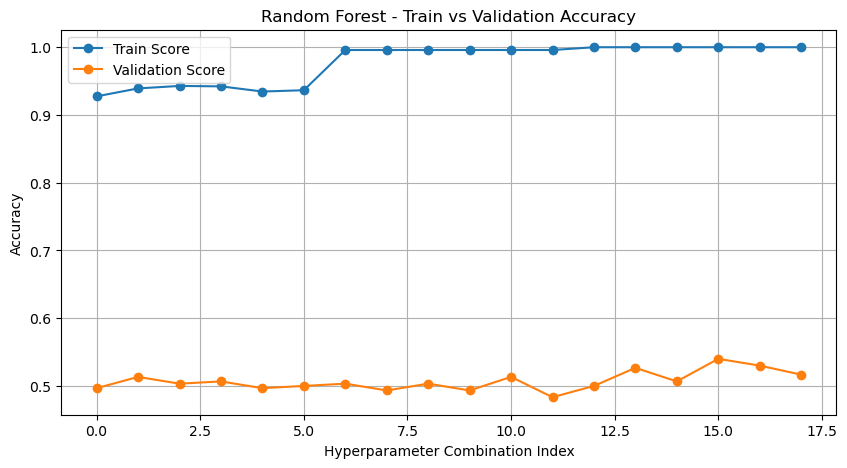

Test accuracy: 0.6333333333333333
Model: XGBoost
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best validation accuracy: 0.6166666666666666


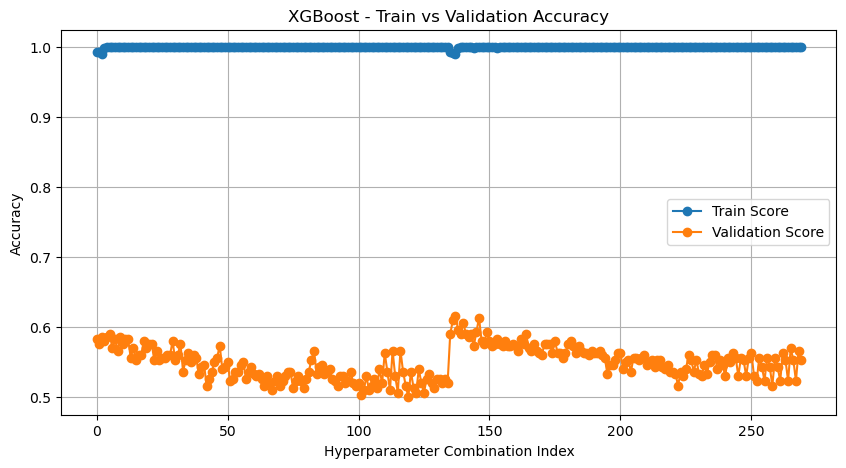

Test accuracy: 0.43333333333333335
Model: SVC
Best params: {'C': np.float64(100.0), 'gamma': np.float64(0.001)}
Best validation accuracy: 0.6366666666666666


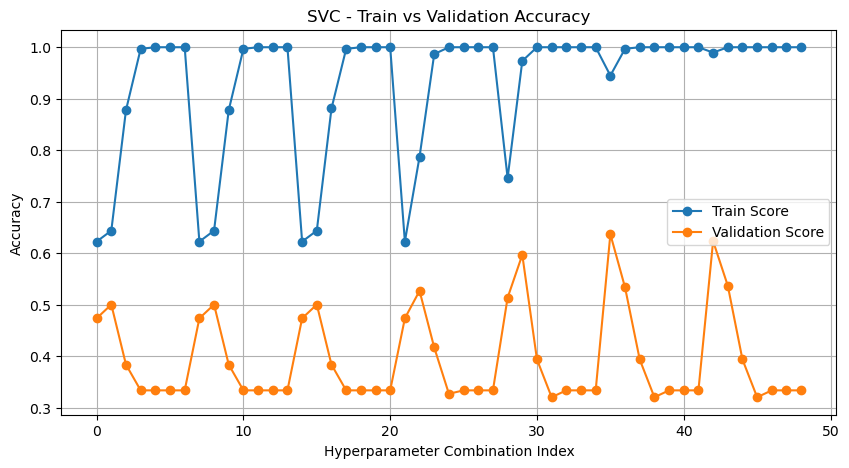

Test accuracy: 0.65
Model: Logistic Regression
Best params: {'C': np.float64(100.0), 'max_iter': 5000}
Best validation accuracy: 0.66


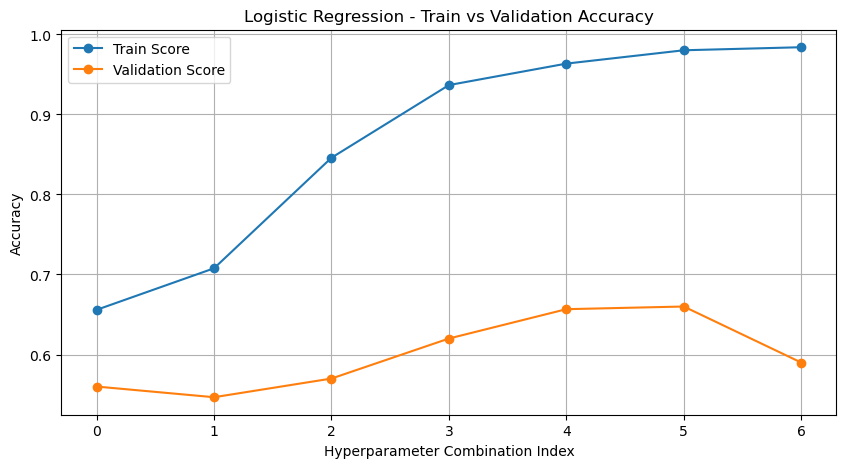

Test accuracy: 0.7333333333333333

FINAL SUMMARY

Model: Decision Tree
Best params: [{'max_depth': 5, 'min_samples_split': 2}]
Mean Test Accuracy: 0.2833333333333333
Test Accuracies: [0.2833333333333333]


Model: Random Forest
Best params: [{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}]
Mean Test Accuracy: 0.6333333333333333
Test Accuracies: [0.6333333333333333]


Model: XGBoost
Best params: [{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}]
Mean Test Accuracy: 0.43333333333333335
Test Accuracies: [0.43333333333333335]


Model: SVC
Best params: [{'C': np.float64(100.0), 'gamma': np.float64(0.001)}]
Mean Test Accuracy: 0.65
Test Accuracies: [0.65]


Model: Logistic Regression
Best params: [{'C': np.float64(100.0), 'max_iter': 5000}]
Mean Test Accuracy: 0.7333333333333333
Test Accuracies: [0.7333333333333333]




In [56]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# X = df_prep[['leg1_joint1_mean_angle',
#        'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
#        'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
#        'leg2_joint3_mean_angle',
#        'ankle_diff','knee_diff','hip_diff']]

X = df_prep[[
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
       # 'leg2_joint1_max_angle', 'leg2_joint2_max_angle',
       # 'leg2_joint3_max_angle', 
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
       # 'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
       # 'leg2_joint3_mean_angle', 
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
       # 'leg2_joint1_min_angle', 'leg2_joint2_min_angle',
       # 'leg2_joint3_min_angle', 
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
       # 'leg2_joint1_range_angle', 'leg2_joint2_range_angle',
       # 'leg2_joint3_range_angle', 
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle'
       # 'leg2_joint1_std_angle', 'leg2_joint2_std_angle',
       # 'leg2_joint3_std_angle',
       # 'ankle_diff','knee_diff','hip_diff'
             ]]

y = df_prep['condition']
y = df_prep["condition"] - 1
groups = df_prep['subject']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train_val = X.iloc[train_val_idx]
y_train_val = y.iloc[train_val_idx]
groups_train_val = groups.iloc[train_val_idx]

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

print("Train+Val size:", X_train_val.shape)
print("Test size:", X_test.shape)


# baseline
majority_class = y_train_val.value_counts().idxmax()
baseline_acc = (y_train_val == majority_class).mean()
print(f"Baseline Accuracy: {baseline_acc:.4f}")


models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression()
}

continuous = [
        'leg1_joint1_max_angle',
       'leg1_joint2_max_angle', 'leg1_joint3_max_angle',
       # 'leg2_joint1_max_angle', 'leg2_joint2_max_angle',
       # 'leg2_joint3_max_angle', 
        'leg1_joint1_mean_angle',
       'leg1_joint2_mean_angle', 'leg1_joint3_mean_angle',
       # 'leg2_joint1_mean_angle', 'leg2_joint2_mean_angle',
       # 'leg2_joint3_mean_angle', 
        'leg1_joint1_min_angle',
       'leg1_joint2_min_angle', 'leg1_joint3_min_angle',
       # 'leg2_joint1_min_angle', 'leg2_joint2_min_angle',
       # 'leg2_joint3_min_angle', 
        'leg1_joint1_range_angle',
       'leg1_joint2_range_angle', 'leg1_joint3_range_angle',
       # 'leg2_joint1_range_angle', 'leg2_joint2_range_angle',
       # 'leg2_joint3_range_angle', 
        'leg1_joint1_std_angle',
       'leg1_joint2_std_angle', 'leg1_joint3_std_angle'
       # 'leg2_joint1_std_angle', 'leg2_joint2_std_angle',
       # 'leg2_joint3_std_angle',
       # 'ankle_diff','knee_diff','hip_diff'
             ]

param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, 7, 10],
        "min_samples_split": [2, 5, 10]
    },

    "Random Forest": {
        "n_estimators": [200, 500, 1000],
        "max_depth": [3, 5, 10],
        "max_features": ["sqrt", "log2"],
    },

    "XGBoost": {
        "n_estimators": [300, 500, 800],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01,0.025,0.05,0.1,0.25],
        "subsample": [0.6, 0.8, 0.9],
        "colsample_bytree": [0.7, 1.0]
    },

    "SVC": {
        "C": np.logspace(-3,3,7),
        "gamma": np.logspace(-3, 3, 7)
    },

    "Logistic Regression": {
        "C": np.logspace(-3,3,7),
        "max_iter": [5000]
    }
}

kfold = GroupKFold(n_splits=5)

test_scores = {name: [] for name in models.keys()}
best_params_all = {name: [] for name in models.keys()}

for name, base_model in models.items():
    print(f"Model: {name}")

    grid = list(ParameterGrid(param_grids[name]))
    val_scores_all_params = []
    train_scores_all_params = []

    # For each hyperparameter combination
    for params in grid:
        fold_val_scores = []
        fold_train_scores = []

        # 5-fold GroupKFold
        for train_idx, val_idx in kfold.split(X_train_val, y_train_val, groups_train_val):

            X_train = X_train_val.iloc[train_idx]
            X_val   = X_train_val.iloc[val_idx]

            y_train = y_train_val.iloc[train_idx]
            y_val   = y_train_val.iloc[val_idx]

            # Build pipeline
            pipe = Pipeline([
                ("scaler", StandardScaler()),
                ("clf", base_model.__class__(**params))
            ])

            pipe.fit(X_train, y_train)

            # train score
            train_pred = pipe.predict(X_train)
            fold_train_scores.append(accuracy_score(y_train, train_pred))

            # validation score
            val_pred = pipe.predict(X_val)
            fold_val_scores.append(accuracy_score(y_val, val_pred))

        # average train/val score for this hyperparameter combination
        avg_train = np.mean(fold_train_scores)
        avg_val = np.mean(fold_val_scores)

        train_scores_all_params.append(avg_train)
        val_scores_all_params.append(avg_val)

    # choose best params
    best_idx = np.argmax(val_scores_all_params)
    best_params = grid[best_idx]
    best_params_all[name].append(best_params)

    print("Best params:", best_params)
    print("Best validation accuracy:", val_scores_all_params[best_idx])

    plt.figure(figsize=(10,5))
    plt.plot(train_scores_all_params, label="Train Score", marker='o')
    plt.plot(val_scores_all_params, label="Validation Score", marker='o')
    plt.title(f"{name} - Train vs Validation Accuracy")
    plt.xlabel("Hyperparameter Combination Index")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    best_model = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", base_model.__class__(**best_params))
    ])

    best_model.fit(X_train_val, y_train_val)
    y_test_pred = best_model.predict(X_test)

    test_acc = accuracy_score(y_test, y_test_pred)
    test_scores[name].append(test_acc)

    print("Test accuracy:", test_acc)


print("\nFINAL SUMMARY\n")
for name in models.keys():
    print(f"Model: {name}")
    print("Best params:", best_params_all[name])
    print("Mean Test Accuracy:", np.mean(test_scores[name]))
    print("Test Accuracies:", test_scores[name])
    print("\n")

using all the features

In [66]:
import pickle

best_xgb_params = best_params_all["XGBoost"][0]
print("Best XGBoost params:", best_xgb_params)

nr_runs = 10
feature_names = X.columns.tolist()

baseline_acc = final_xgb.score(X_test, y_test)
print("Baseline test accuracy:", baseline_acc)

perm_result = pd.DataFrame(index=feature_names,
                           columns=["shuffled_mean", "shuffled_std"])

for f in feature_names:
    acc_scores = []

    for r in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[f] = np.random.permutation(X_test[f].values)

        acc_scores.append(final_xgb.score(X_test_shuffled, y_test))

    perm_result.loc[f, "shuffled_mean"] = np.mean(acc_scores)
    perm_result.loc[f, "shuffled_std"]  = np.std(acc_scores)

    print(f"{f}: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")

Best XGBoost params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


NameError: name 'final_xgb' is not defined